[*********************100%%**********************]  1 of 1 completed


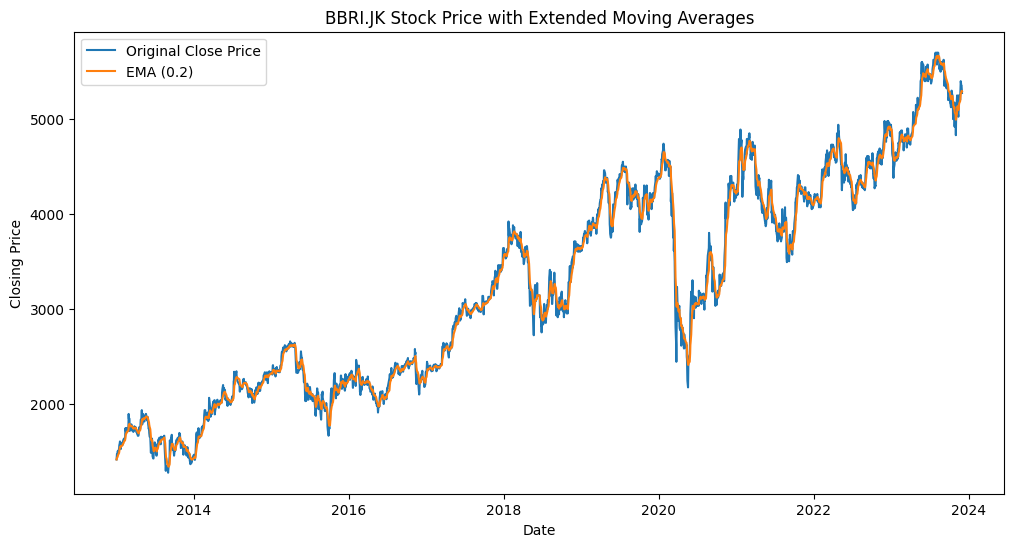

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

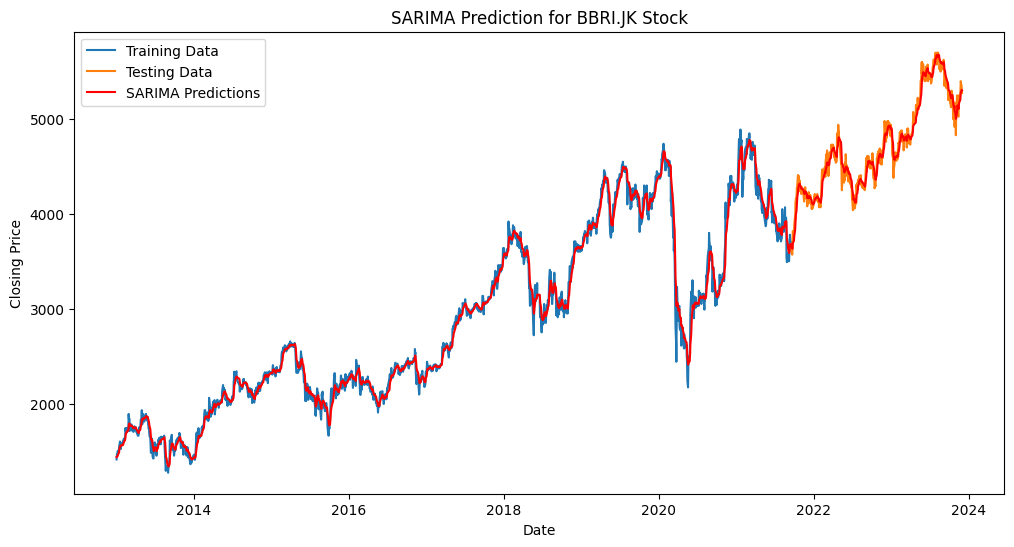

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


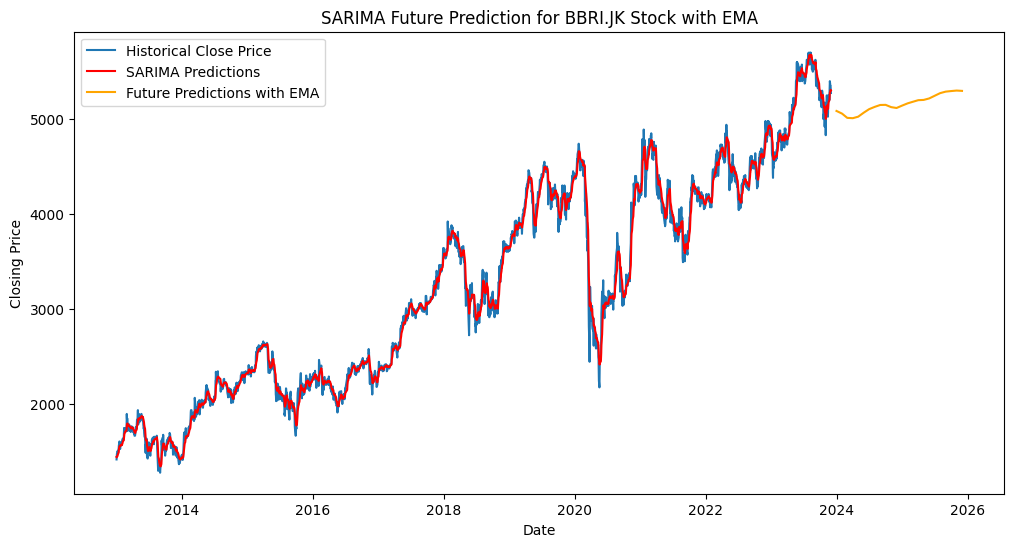

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Function to calculate Extended Moving Averages (EMA)
def calculate_ema(data, alpha):
    return data.ewm(alpha=alpha, adjust=False).mean()

# Function to split data into training and testing sets
def train_test_split(data, test_size=0.2):
    split_index = int(len(data) * (1 - test_size))
    train, test = data[:split_index], data[split_index:]
    return train, test

# Download historical data for BBRI.JK
bbri_ticker = 'BBRI.JK'
start_date = '2013-01-01'
end_date = '2023-12-1'
bbri_data = yf.download(bbri_ticker, start=start_date, end=end_date)

# Use 'Close' prices or 'Adj Close' if 'Close' is not available
close_prices = bbri_data['Close'] if 'Close' in bbri_data.columns else bbri_data['Adj Close']

# Calculate Extended Moving Averages (EMA)
alpha = 0.2  # Adjust this parameter based on your preference
bbri_data['EMA'] = calculate_ema(close_prices, alpha)

# Plot the original data and EMA
plt.figure(figsize=(12, 6))
plt.plot(bbri_data.index, close_prices, label='Original Close Price')
plt.plot(bbri_data.index, bbri_data['EMA'], label=f'EMA ({alpha})')
plt.title('BBRI.JK Stock Price with Extended Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_data, test_data = train_test_split(close_prices)

# SARIMA model
order = (3, 0, 2)  # Adjust these parameters based on your analysis
seasonal_order = (3, 0, 2, 12)
exog_vars = bbri_data['EMA'].loc[train_data.index]  # Match indices

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, exog=exog_vars)
results = model.fit(disp=False)

# Make predictions on the testing set
forecast_steps = len(bbri_data['Close'])
exog_test_vars = bbri_data['EMA'].loc[bbri_data.index]  # Match indices
forecast = results.get_forecast(steps=forecast_steps, exog=exog_test_vars)
predictions = forecast.predicted_mean

# Plot the SARIMA predictions against the actual testing set
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(bbri_data.index, predictions, color='red', label='SARIMA Predictions')
plt.title('SARIMA Prediction for BBRI.JK Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Predict 24 months into the future with Extended Moving Averages
forecast_steps_future = 24
future_index = pd.date_range(bbri_data.index[-1], periods=forecast_steps_future + 1, freq='M')[1:]
exog_future_vars = calculate_ema(close_prices, alpha)[-forecast_steps_future:]  # Use EMA for the future

# Make future predictions with SARIMA model
forecast_future = results.get_forecast(steps=forecast_steps_future, exog=exog_future_vars)
predictions_future = forecast_future.predicted_mean

# Plot the SARIMA predictions for the future along with Extended Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(bbri_data.index, close_prices, label='Historical Close Price')
plt.plot(bbri_data.index, predictions, color='red', label='SARIMA Predictions')
plt.plot(future_index, predictions_future, color='orange', label='Future Predictions with EMA')
plt.title('SARIMA Future Prediction for BBRI.JK Stock with EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Trading Signals:
Buy Signal: True
Sell Signal: True


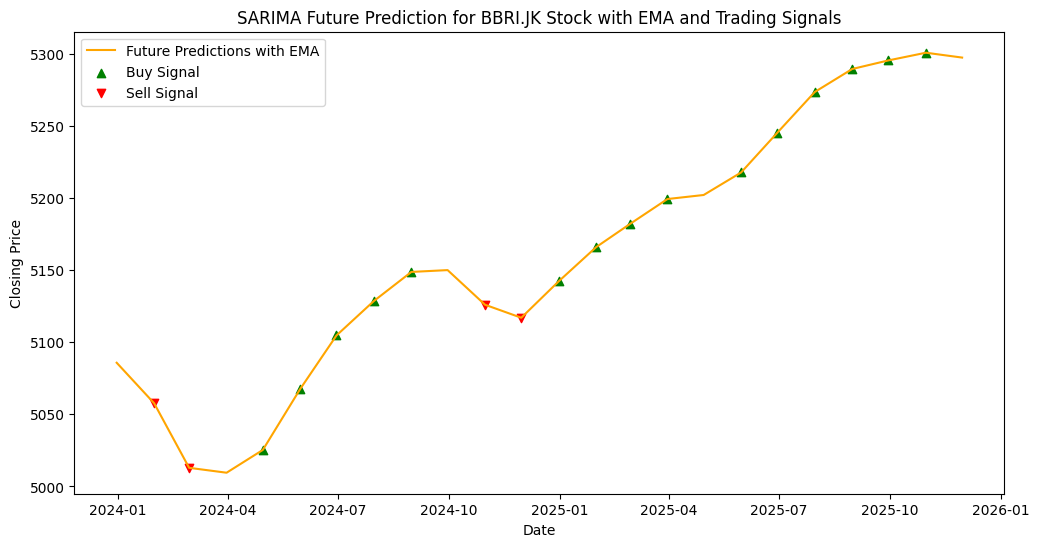

In [ ]:
# Assuming 'predictions_future' contains the forecasted values for the next 24 months

# Calculate the percentage change in predicted values
predicted_pct_change = predictions_future.pct_change()

# Define a threshold for buying and selling signals
buy_threshold = 0.001  # Example: Buy if the predicted percentage change is greater than 2%
sell_threshold = -0.001  # Example: Sell if the predicted percentage change is less than -2%

# Generate buy/sell signals based on the thresholds
buy_signal = predicted_pct_change > buy_threshold
sell_signal = predicted_pct_change < sell_threshold

# Display the trading signals
print("Trading Signals:")
print("Buy Signal:", buy_signal.any())
print("Sell Signal:", sell_signal.any())

# Visualize the trading signals
plt.figure(figsize=(12, 6))
plt.plot(future_index, predictions_future, color='orange', label='Future Predictions with EMA')
plt.scatter(future_index[buy_signal], predictions_future[buy_signal], color='green', marker='^', label='Buy Signal')
plt.scatter(future_index[sell_signal], predictions_future[sell_signal], color='red', marker='v', label='Sell Signal')
plt.title('SARIMA Future Prediction for BBRI.JK Stock with EMA and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Assuming 'predictions_future', 'buy_signal', 'sell_signal', and 'future_index' are already defined

# Create a DataFrame to store the signals and predicted prices
signals_df = pd.DataFrame({
    'Date': future_index,
    'Predicted_Price': predictions_future,
    'Buy_Signal': buy_signal,
    'Sell_Signal': sell_signal
})

# Print Hasil Rekomendasi
print(signals_df)

# Save the DataFrame to CSV in the current working directory
csv_file_name = 'hasil rekomendasi stock.csv'
signals_df.to_csv(csv_file_name, index=False)

# Display a message indicating that the DataFrame has been saved
print(f"DataFrame saved to {csv_file_name} in the current working directory.")


           Date  Predicted_Price  Buy_Signal  Sell_Signal
2164 2023-12-31      5085.829194       False        False
2165 2024-01-31      5057.742253       False         True
2166 2024-02-29      5012.929729       False         True
2167 2024-03-31      5009.526471       False        False
2168 2024-04-30      5025.333874        True        False
2169 2024-05-31      5067.688683        True        False
2170 2024-06-30      5104.773312        True        False
2171 2024-07-31      5128.687236        True        False
2172 2024-08-31      5148.828359        True        False
2173 2024-09-30      5150.094678       False        False
2174 2024-10-31      5126.054064       False         True
2175 2024-11-30      5117.041672       False         True
2176 2024-12-31      5142.329205        True        False
2177 2025-01-31      5166.045075        True        False
2178 2025-02-28      5182.110851        True        False
2179 2025-03-31      5199.400438        True        False
2180 2025-04-3